# Mean and standard deviation
Author of the solution: Michał Maszkowski (421428)

**Problem 3b.** In this task we consider a discrete distribution *without a mean* and verify whether we can still estimate the location of its peak by simply computing averages. Consider a discrete variable $X$ with the following distribution: $P(X=k) = \frac{1}{4|k|(|k|+1)}$ for integers $k \neq 0$ and $P(X=0) = \frac{1}{2}$. 
 * Argue that these formulas indeed describe a discrete distribution.
 * Show that $X$ does not have a mean.
 * Plot the function $f(k) = P(X=k)$ for $k \in [-10,10]$.
 * Write a function that samples from $X$'s distribution (imaginary bonus points if it is vectorized).
 * Generate $N=10\,000$ values $x_1,\ldots,x_N$ from the distribution.
 * For $i \in \{1,\ldots,N\}$ compute $\bar{x}_i = \frac{x_1+\ldots+x_i}{i}$. 
 * Plot the values of $\bar{x}_i$. Does it look like the series converges? If it is not clear, you can compute several independent
   $N$-means and plot a histogram, then increase $N$ significantly and see how it changes.
 * For $i \in \{1,\ldots,N\}$ compute $\hat{x}_i = \textrm{ median of }\{x_1,\ldots,x_i\}$. 
   You do not need to do it in a clever way.
 * Plot the values of $\hat{x}_i$. Does it look like the series converges? 
 * A more interesting situation would be the one where you a given a distribution like $X+c$ for unknown $c$, and 
   want to figure out what $c$ is, i.e. find the center of the distribution. Both methods above attempt to
   locate the center - which works better?
   
Useful identity: 1/(k*(k+1)) = 1/k - 1/(k+1)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

N = 10000

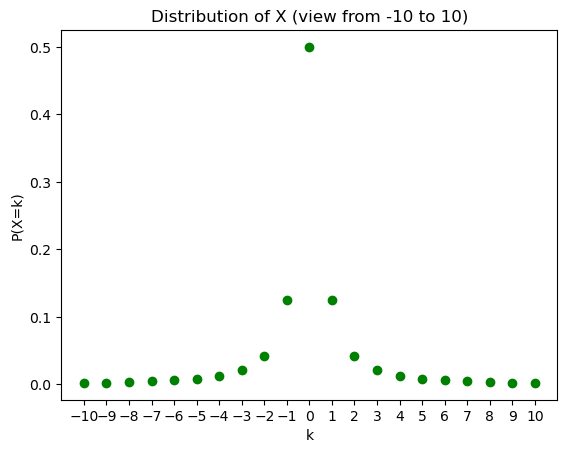

In [2]:
def P_X(k):
    return (np.equal(k, 0))*0.5 + (np.not_equal(k, 0))/(4*np.absolute(k+(np.equal(k, 0)))*(np.absolute(k) + 1))

args = np.arange(-10, 11)
values = P_X(args)

plt.xticks(args)
plt.plot(args, values, 'og')
plt.ylabel('P(X=k)')
plt.xlabel('k')
plt.title('Distribution of X (view from -10 to 10)')
plt.show()

In [3]:
#inspiracja/pierwsze podejscie do niższej funkcji działającej na macierzach - zostawiam bo tu widaćco się dzieje
#def Q(arg):
#    if (arg <= 1/4):
#        return np.ceil(-1/(4*arg + np.equal(arg, 0)))
#    elif (arg < 3/4):
#        return 0
#    else:
#        return np.ceil(1/(4*(1-arg)) - 1)
    
def Q_X(arg):
    return np.less_equal(arg, 1/4)*(np.ceil(-1/(4*arg + np.equal(arg, 0)))) + 0 + np.greater(arg, 3/4)*(np.ceil(1/(4*(1-arg)) - 1))  
def sample_X(N):
    arg = np.random.rand(N)
    return Q_X(arg)


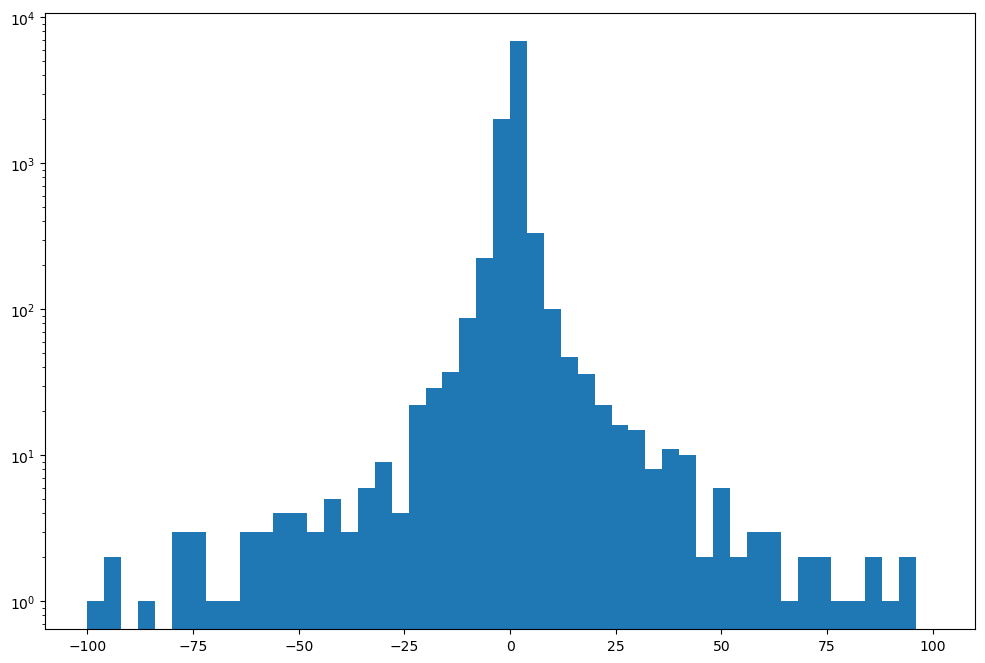

In [4]:
x = sample_X(N)

plt.figure(figsize=(12, 8))
plt.hist(x, bins=50, log=True, range=(-100, 100)); 
#obcięty zakres i skala logarytmiczna na osi y, żeby było cokolwiek widać poza głównym peakiem

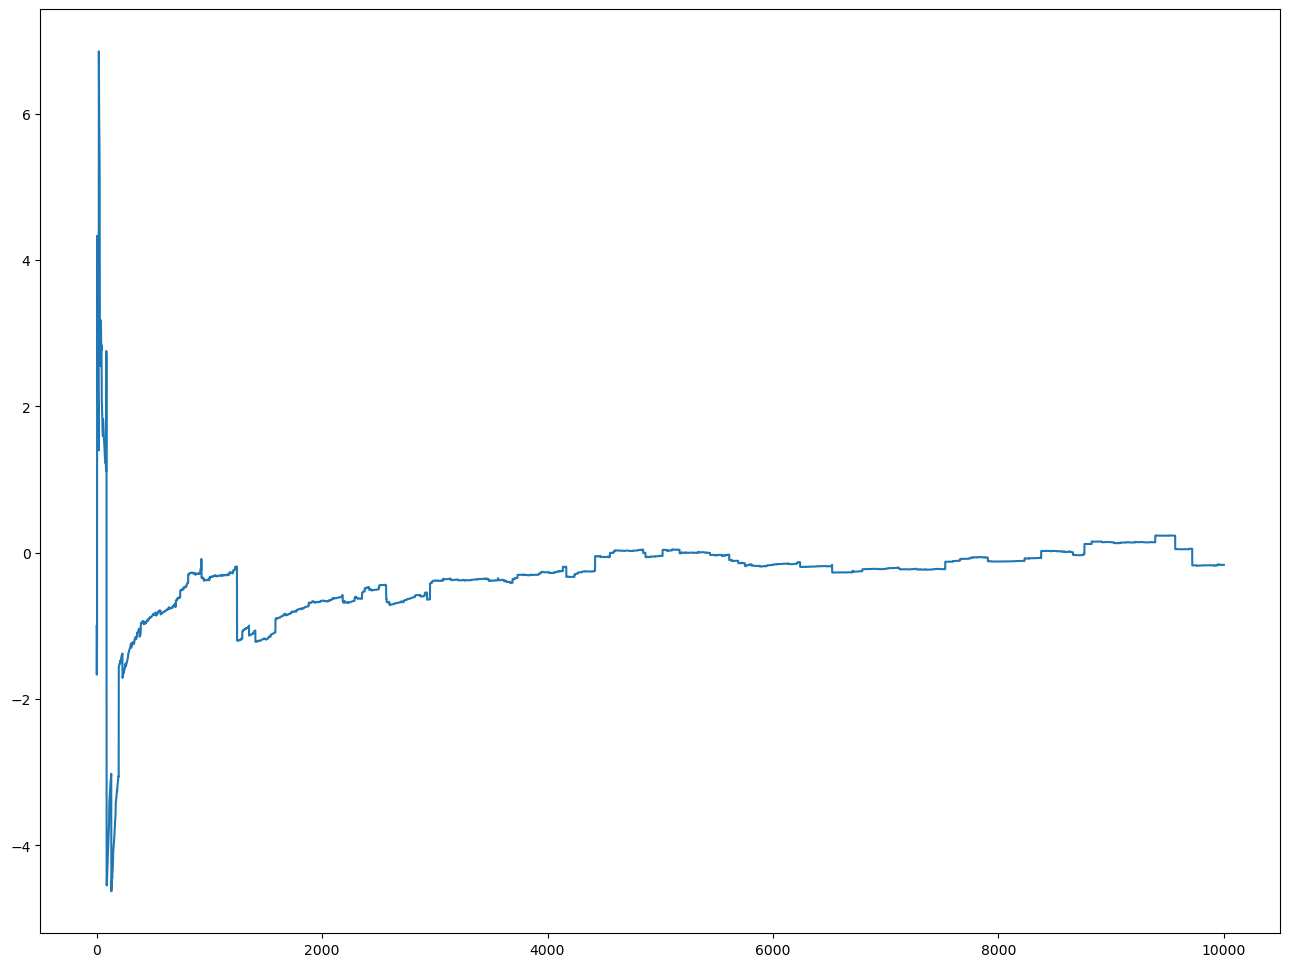

In [5]:
means = np.cumsum(x).astype(np.float32) / np.arange(1, N + 1)  # compute cumulative means

plt.figure(figsize=(16, 12))
plt.plot(means);
#wygląda jakby średnie zbiegały do 0 - powinny do 0

In [6]:
print(np.mean(x))

-0.1652


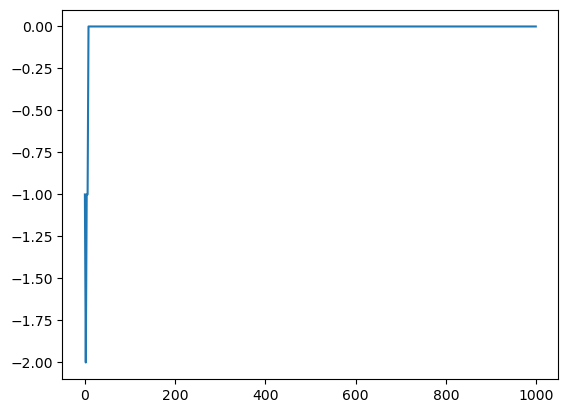

In [7]:
mediany=[]
for i in range(1000):
    mediany.append(np.median(x[:(i+1)]))

plt.plot(mediany);
#mediana zbiega prawie od razu do 0